In [1]:
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


In [2]:
data = Dataset('/home/dang032003/Final-Thesis/2024042300.nc')


In [3]:
data.variables.keys()

dict_keys(['lon', 'lat', 'lev', 'lev_o3', 'lev_soil', 'time', 'terrain', 'landsea_mask', 'rain', 'cloud', 't2m', 'q2m', 'u10m', 'v10m', 'ps', 'pmsl', 'ts', 'wsnow', 'w850', 'w700', 'nswflux', 'nlwflux', 'olr', 'tsoil', 'wsoil', 'o3', 'h', 'u', 'v', 't', 'q', 'qc'])

In [4]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]
rain = data.variables['rain'][:]
temp = data.variables['t'][:]
hum = data.variables['q'][:]
eastward_wind = data.variables['u'][:]
northward_wind = data.variables['v'][:]
ozone_conc = data.variables['o3'][:]
pressure = data.variables['ps'][:]
cloud = data.variables['cloud'][:]

In [5]:
ds = xr.open_dataset('/home/dang032003/Final-Thesis/2024042300.nc')
print(ds)

<xarray.Dataset>
Dimensions:       (lon: 191, lat: 151, lev: 26, lev_o3: 6, lev_soil: 4, time: 29)
Coordinates:
  * lon           (lon) float32 60.0 60.5 61.0 61.5 ... 153.5 154.0 154.5 155.0
  * lat           (lat) float32 -15.0 -14.5 -14.0 -13.5 ... 58.5 59.0 59.5 60.0
  * lev           (lev) int16 1000 975 950 925 900 850 ... 100 70 50 30 20 10
  * lev_o3        (lev_o3) int16 100 70 50 30 20 10
  * lev_soil      (lev_soil) int16 0 10 40 100
  * time          (time) datetime64[ns] 2024-04-23 ... 2024-04-26T12:00:00
Data variables: (12/26)
    terrain       (lat, lon) float64 ...
    landsea_mask  (lat, lon) float64 ...
    rain          (time, lat, lon) float64 ...
    cloud         (time, lat, lon) float64 ...
    t2m           (time, lat, lon) float64 ...
    q2m           (time, lat, lon) float64 ...
    ...            ...
    h             (time, lev, lat, lon) float64 ...
    u             (time, lev, lat, lon) float64 ...
    v             (time, lev, lat, lon) float64 ...
   

In [6]:
rain_data = ds['rain']
rain_at_timestep0 = rain_data.sel(time=ds['time'].values[0])  # Get rain at the first time step

In [7]:
print(rain_data)

<xarray.DataArray 'rain' (time: 29, lat: 151, lon: 191)>
[836389 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 60.0 60.5 61.0 61.5 62.0 ... 153.5 154.0 154.5 155.0
  * lat      (lat) float32 -15.0 -14.5 -14.0 -13.5 -13.0 ... 58.5 59.0 59.5 60.0
  * time     (time) datetime64[ns] 2024-04-23 ... 2024-04-26T12:00:00
Attributes:
    units:    mm


In [8]:
# Example: Extract data for Hanoi region over all timesteps
hanoi_lon = 106  
hanoi_lat = 21
rain_hn = ds['rain'].sel(lon=hanoi_lon, lat=hanoi_lat, method='nearest') 
rain_hn_df = rain_hn.to_dataframe()
temp_hn = ds['t'].sel(lon=hanoi_lon, lat=hanoi_lat, lev=1000, method='nearest')
temp_hn_df = temp_hn.to_dataframe()
hum_hn = ds['q'].sel(lon=hanoi_lon, lat=hanoi_lat, lev=1000, method='nearest')
hum_hn_df = hum_hn.to_dataframe()
eastward_wind_hn = ds['u'].sel(lon=hanoi_lon, lat=hanoi_lat, lev=1000, method='nearest')
eastward_wind_hn_df = eastward_wind_hn.to_dataframe()
northward_wind_hn = ds['v'].sel(lon=hanoi_lon, lat=hanoi_lat, lev=1000, method='nearest')
northward_wind_hn_df = northward_wind_hn.to_dataframe()
ozone_conc_hn = ds['o3'].sel(lon=hanoi_lon, lat=hanoi_lat, lev_o3=1000, method='nearest')
ozone_conc_hn_df = ozone_conc_hn.to_dataframe()
pressure_hn = ds['ps'].sel(lon=hanoi_lon, lat=hanoi_lat, method='nearest')
pressure_hn_df = pressure_hn.to_dataframe()



In [9]:
print(rain_hn_df)

                       lon   lat  rain
time                                  
2024-04-23 00:00:00  106.0  21.0   0.0
2024-04-23 03:00:00  106.0  21.0   0.5
2024-04-23 06:00:00  106.0  21.0   1.3
2024-04-23 09:00:00  106.0  21.0   1.8
2024-04-23 12:00:00  106.0  21.0   2.8
2024-04-23 15:00:00  106.0  21.0   4.3
2024-04-23 18:00:00  106.0  21.0   6.0
2024-04-23 21:00:00  106.0  21.0   6.8
2024-04-24 00:00:00  106.0  21.0   8.0
2024-04-24 03:00:00  106.0  21.0   8.9
2024-04-24 06:00:00  106.0  21.0   9.1
2024-04-24 09:00:00  106.0  21.0  10.6
2024-04-24 12:00:00  106.0  21.0  11.0
2024-04-24 15:00:00  106.0  21.0  12.6
2024-04-24 18:00:00  106.0  21.0  12.8
2024-04-24 21:00:00  106.0  21.0  13.0
2024-04-25 00:00:00  106.0  21.0  16.6
2024-04-25 03:00:00  106.0  21.0  16.6
2024-04-25 06:00:00  106.0  21.0  16.6
2024-04-25 09:00:00  106.0  21.0  16.6
2024-04-25 12:00:00  106.0  21.0  17.9
2024-04-25 15:00:00  106.0  21.0  17.9
2024-04-25 18:00:00  106.0  21.0  17.9
2024-04-25 21:00:00  106.

In [10]:
print(temp_hn_df)

                       lon   lat   lev           t
time                                              
2024-04-23 00:00:00  106.0  21.0  1000  298.949993
2024-04-23 03:00:00  106.0  21.0  1000  300.099993
2024-04-23 06:00:00  106.0  21.0  1000  301.399993
2024-04-23 09:00:00  106.0  21.0  1000  300.119993
2024-04-23 12:00:00  106.0  21.0  1000  298.729993
2024-04-23 15:00:00  106.0  21.0  1000  298.219993
2024-04-23 18:00:00  106.0  21.0  1000  297.149993
2024-04-23 21:00:00  106.0  21.0  1000  296.799993
2024-04-24 00:00:00  106.0  21.0  1000  296.729993
2024-04-24 03:00:00  106.0  21.0  1000  298.809993
2024-04-24 06:00:00  106.0  21.0  1000  304.779993
2024-04-24 09:00:00  106.0  21.0  1000  303.229993
2024-04-24 12:00:00  106.0  21.0  1000  299.189993
2024-04-24 15:00:00  106.0  21.0  1000  296.549993
2024-04-24 18:00:00  106.0  21.0  1000  295.999993
2024-04-24 21:00:00  106.0  21.0  1000  296.319993
2024-04-25 00:00:00  106.0  21.0  1000  296.259993
2024-04-25 03:00:00  106.0  21.

In [11]:
print(hum_hn_df)

                       lon   lat   lev       q
time                                          
2024-04-23 00:00:00  106.0  21.0  1000  19.411
2024-04-23 03:00:00  106.0  21.0  1000  18.890
2024-04-23 06:00:00  106.0  21.0  1000  19.011
2024-04-23 09:00:00  106.0  21.0  1000  16.879
2024-04-23 12:00:00  106.0  21.0  1000  15.971
2024-04-23 15:00:00  106.0  21.0  1000  16.381
2024-04-23 18:00:00  106.0  21.0  1000  17.136
2024-04-23 21:00:00  106.0  21.0  1000  16.992
2024-04-24 00:00:00  106.0  21.0  1000  17.092
2024-04-24 03:00:00  106.0  21.0  1000  17.643
2024-04-24 06:00:00  106.0  21.0  1000  16.526
2024-04-24 09:00:00  106.0  21.0  1000  18.250
2024-04-24 12:00:00  106.0  21.0  1000  18.625
2024-04-24 15:00:00  106.0  21.0  1000  15.150
2024-04-24 18:00:00  106.0  21.0  1000  15.036
2024-04-24 21:00:00  106.0  21.0  1000  15.764
2024-04-25 00:00:00  106.0  21.0  1000  16.214
2024-04-25 03:00:00  106.0  21.0  1000  18.023
2024-04-25 06:00:00  106.0  21.0  1000  17.518
2024-04-25 09

In [12]:
print(eastward_wind_hn_df)

                       lon   lat   lev     u
time                                        
2024-04-23 00:00:00  106.0  21.0  1000 -4.07
2024-04-23 03:00:00  106.0  21.0  1000 -3.60
2024-04-23 06:00:00  106.0  21.0  1000 -3.41
2024-04-23 09:00:00  106.0  21.0  1000 -3.98
2024-04-23 12:00:00  106.0  21.0  1000 -1.98
2024-04-23 15:00:00  106.0  21.0  1000 -0.80
2024-04-23 18:00:00  106.0  21.0  1000  0.91
2024-04-23 21:00:00  106.0  21.0  1000 -0.26
2024-04-24 00:00:00  106.0  21.0  1000 -0.67
2024-04-24 03:00:00  106.0  21.0  1000 -0.10
2024-04-24 06:00:00  106.0  21.0  1000 -2.17
2024-04-24 09:00:00  106.0  21.0  1000 -2.45
2024-04-24 12:00:00  106.0  21.0  1000 -2.36
2024-04-24 15:00:00  106.0  21.0  1000  1.08
2024-04-24 18:00:00  106.0  21.0  1000  1.11
2024-04-24 21:00:00  106.0  21.0  1000 -0.23
2024-04-25 00:00:00  106.0  21.0  1000 -2.81
2024-04-25 03:00:00  106.0  21.0  1000  0.15
2024-04-25 06:00:00  106.0  21.0  1000 -0.22
2024-04-25 09:00:00  106.0  21.0  1000 -3.88
2024-04-25

In [13]:
print(northward_wind_hn_df)

                       lon   lat   lev     v
time                                        
2024-04-23 00:00:00  106.0  21.0  1000  1.34
2024-04-23 03:00:00  106.0  21.0  1000  0.61
2024-04-23 06:00:00  106.0  21.0  1000 -1.78
2024-04-23 09:00:00  106.0  21.0  1000 -4.94
2024-04-23 12:00:00  106.0  21.0  1000 -4.01
2024-04-23 15:00:00  106.0  21.0  1000  0.74
2024-04-23 18:00:00  106.0  21.0  1000  0.53
2024-04-23 21:00:00  106.0  21.0  1000 -0.63
2024-04-24 00:00:00  106.0  21.0  1000 -1.19
2024-04-24 03:00:00  106.0  21.0  1000  0.60
2024-04-24 06:00:00  106.0  21.0  1000  4.96
2024-04-24 09:00:00  106.0  21.0  1000  5.08
2024-04-24 12:00:00  106.0  21.0  1000  3.44
2024-04-24 15:00:00  106.0  21.0  1000  2.83
2024-04-24 18:00:00  106.0  21.0  1000 -2.12
2024-04-24 21:00:00  106.0  21.0  1000 -0.93
2024-04-25 00:00:00  106.0  21.0  1000  3.01
2024-04-25 03:00:00  106.0  21.0  1000  4.25
2024-04-25 06:00:00  106.0  21.0  1000  4.37
2024-04-25 09:00:00  106.0  21.0  1000  6.10
2024-04-25

In [14]:
print(ozone_conc_hn_df)

                       lon   lat  lev_o3      o3
time                                            
2024-04-23 00:00:00  106.0  21.0     100  0.0002
2024-04-23 03:00:00  106.0  21.0     100  0.0003
2024-04-23 06:00:00  106.0  21.0     100  0.0002
2024-04-23 09:00:00  106.0  21.0     100  0.0002
2024-04-23 12:00:00  106.0  21.0     100  0.0002
2024-04-23 15:00:00  106.0  21.0     100  0.0002
2024-04-23 18:00:00  106.0  21.0     100  0.0002
2024-04-23 21:00:00  106.0  21.0     100  0.0002
2024-04-24 00:00:00  106.0  21.0     100  0.0002
2024-04-24 03:00:00  106.0  21.0     100  0.0002
2024-04-24 06:00:00  106.0  21.0     100  0.0002
2024-04-24 09:00:00  106.0  21.0     100  0.0002
2024-04-24 12:00:00  106.0  21.0     100  0.0002
2024-04-24 15:00:00  106.0  21.0     100  0.0002
2024-04-24 18:00:00  106.0  21.0     100  0.0002
2024-04-24 21:00:00  106.0  21.0     100  0.0002
2024-04-25 00:00:00  106.0  21.0     100  0.0002
2024-04-25 03:00:00  106.0  21.0     100  0.0002
2024-04-25 06:00:00 

In [15]:
print(pressure_hn_df)

                       lon   lat           ps
time                                         
2024-04-23 00:00:00  106.0  21.0  1005.999994
2024-04-23 03:00:00  106.0  21.0  1007.349994
2024-04-23 06:00:00  106.0  21.0  1005.629994
2024-04-23 09:00:00  106.0  21.0  1003.269994
2024-04-23 12:00:00  106.0  21.0  1004.739994
2024-04-23 15:00:00  106.0  21.0  1007.149994
2024-04-23 18:00:00  106.0  21.0  1005.929994
2024-04-23 21:00:00  106.0  21.0  1004.969994
2024-04-24 00:00:00  106.0  21.0  1006.659994
2024-04-24 03:00:00  106.0  21.0  1007.479994
2024-04-24 06:00:00  106.0  21.0  1003.429994
2024-04-24 09:00:00  106.0  21.0  1001.779994
2024-04-24 12:00:00  106.0  21.0  1003.879994
2024-04-24 15:00:00  106.0  21.0  1005.239994
2024-04-24 18:00:00  106.0  21.0  1005.089994
2024-04-24 21:00:00  106.0  21.0  1004.089994
2024-04-25 00:00:00  106.0  21.0  1004.859994
2024-04-25 03:00:00  106.0  21.0  1004.759994
2024-04-25 06:00:00  106.0  21.0  1001.329994
2024-04-25 09:00:00  106.0  21.0  

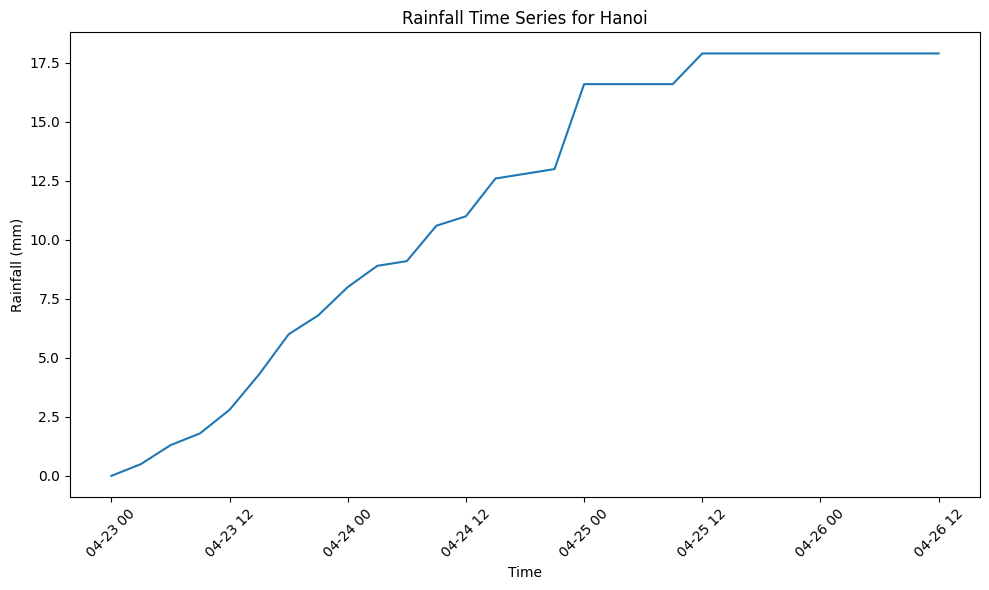

In [16]:
plt.figure(figsize=(10, 6)) 
plt.plot(rain_hn_df.index, rain_hn_df['rain'])  # Plot using the index

# Labels, Title, and Formatting
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)') # Or your appropriate units
plt.title('Rainfall Time Series for Hanoi')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45) 

# Ensure a tight layout
plt.tight_layout()

plt.show()


In [17]:
rain_hn_data = rain_hn_df.iloc[1]
print(rain_hn_data)

lon     106.0
lat      21.0
rain      0.5
Name: 2024-04-23 03:00:00, dtype: float64


In [18]:
import pandas as pd

# Base dataframe with 'time', 'lon', 'lat'
base_df = rain_hn_df.reset_index()

# Combine all the dataframes using 'time', 'lon', 'lat' as keys
all_data_df = base_df
all_data_df = all_data_df.merge(temp_hn_df.reset_index(), on=['time', 'lon', 'lat'], how='outer')
all_data_df = all_data_df.merge(hum_hn_df.reset_index(), on=['time', 'lon', 'lat'], how='outer')
all_data_df = all_data_df.merge(ozone_conc_hn_df.reset_index(), on=['time', 'lon', 'lat'], how='outer')
all_data_df = all_data_df.merge(pressure_hn_df.reset_index(), on=['time', 'lon', 'lat'], how='outer')

# Sort by time if needed
all_data_df = all_data_df.sort_values(by='time')

# Print or analyze the combined dataframe
print(all_data_df)


                  time    lon   lat  rain  lev_x           t  lev_y       q  \
0  2024-04-23 00:00:00  106.0  21.0   0.0   1000  298.949993   1000  19.411   
1  2024-04-23 03:00:00  106.0  21.0   0.5   1000  300.099993   1000  18.890   
2  2024-04-23 06:00:00  106.0  21.0   1.3   1000  301.399993   1000  19.011   
3  2024-04-23 09:00:00  106.0  21.0   1.8   1000  300.119993   1000  16.879   
4  2024-04-23 12:00:00  106.0  21.0   2.8   1000  298.729993   1000  15.971   
5  2024-04-23 15:00:00  106.0  21.0   4.3   1000  298.219993   1000  16.381   
6  2024-04-23 18:00:00  106.0  21.0   6.0   1000  297.149993   1000  17.136   
7  2024-04-23 21:00:00  106.0  21.0   6.8   1000  296.799993   1000  16.992   
8  2024-04-24 00:00:00  106.0  21.0   8.0   1000  296.729993   1000  17.092   
9  2024-04-24 03:00:00  106.0  21.0   8.9   1000  298.809993   1000  17.643   
10 2024-04-24 06:00:00  106.0  21.0   9.1   1000  304.779993   1000  16.526   
11 2024-04-24 09:00:00  106.0  21.0  10.6   1000  30

In [19]:
np.random.seed(42)  # Setting a seed for reproducibility
all_data_df['pm2_5'] = np.random.uniform(0, 200, size=len(all_data_df))

# Print the first few rows of the DataFrame to verify
print(all_data_df.head())

                 time    lon   lat  rain  lev_x           t  lev_y       q  \
0 2024-04-23 00:00:00  106.0  21.0   0.0   1000  298.949993   1000  19.411   
1 2024-04-23 03:00:00  106.0  21.0   0.5   1000  300.099993   1000  18.890   
2 2024-04-23 06:00:00  106.0  21.0   1.3   1000  301.399993   1000  19.011   
3 2024-04-23 09:00:00  106.0  21.0   1.8   1000  300.119993   1000  16.879   
4 2024-04-23 12:00:00  106.0  21.0   2.8   1000  298.729993   1000  15.971   

   lev_o3      o3           ps       pm2_5  
0     100  0.0002  1005.999994   74.908024  
1     100  0.0003  1007.349994  190.142861  
2     100  0.0002  1005.629994  146.398788  
3     100  0.0002  1003.269994  119.731697  
4     100  0.0002  1004.739994   31.203728  


In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

all_data_df.fillna(all_data_df.mean(), inplace=True)  # Replace missing values with column means
X = all_data_df[['t', 'q', 'rain', 'o3', 'ps']]
Y = all_data_df['pm2_5']
#Spliting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

XGB_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)
XGB_model.fit(X_train, Y_train)

Y_pred = XGB_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 49.482602895250295


In [21]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)
Y_pred = LR_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 42.06030345659135


In [22]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_tree_model.fit(X_train, Y_train)
Y_pred = extra_tree_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 48.77940475721062


In [23]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 36.82960968164056


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 29.796787631512743
